In [1]:
# These imports are used in BST.draw().
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import numpy as np 
import time
from matplotlib import pyplot as plt

In [2]:
class SinglyLinkedListNode:
    """A node with a value and a reference to the next node."""
    def __init__(self, data):
        self.value, self.next = data, None

class SinglyLinkedList:
    """A singly linked list with a head and a tail."""
    def __init__(self):
        self.head, self.tail = None, None

    def append(self, data):
        """Add a node containing the data to the end of the list."""
        n = SinglyLinkedListNode(data)
        if self.head is None:
            self.head, self.tail = n, n
        else:
            self.tail.next = n
            self.tail = n

    def iterative_find(self, data):
        """Search iteratively for a node containing the data.
        If there is no such node in the list, including if the list is empty,
        raise a ValueError.

        Returns:
            (SinglyLinkedListNode): the node containing the data.
        """
        current = self.head
        while current is not None:
            if current.value == data:
                return current
            current = current.next
        raise ValueError(str(data) + " is not in the list")

    def recursive_find(self, data):
        """Search recursively for the node containing the data.
        If there is no such node in the list, including if the list is empty,
        raise a ValueError.

        Returns:
            (SinglyLinkedListNode): the node containing the data.
        """

        # Define a recursive function to traverse the list.
        def rec_find(iter_):
            """Recursively step through the list until the node containing
            the data is found. If there is no such node, raise a Value Error.
            """
            if iter_ == None:
                raise ValueError("Data could not be found, or empty list")
            elif iter_.value == data:
                return iter_
            else:
                return rec_find(iter_.next)

        # Start the recursion on the head of the list.
        return rec_find(self.head)

In [3]:
class BSTNode:
    """A node class for binary search trees. Contains a value, a
    reference to the parent node, and references to two child nodes.
    """
    def __init__(self, data):
        """Construct a new node and set the value attribute. The other
        attributes will be set when the node is added to a tree.
        """
        self.value = data
        self.prev = None        # A reference to this node's parent node.
        self.left = None        # self.left.value < self.value
        self.right = None       # self.value < self.right.value


class BST:
    """Binary search tree data structure class.
    The root attribute references the first node in the tree.
    """
    def __init__(self):
        """Initialize the root attribute."""
        self.root = None

    def find(self, data):
        """Return the node containing the data. If there is no such node
        in the tree, including if the tree is empty, raise a ValueError.
        """

        # Define a recursive function to traverse the tree.
        def _step(current):
            """Recursively step through the tree until the node containing
            the data is found. If there is no such node, raise a Value Error.
            """
            if current is None:                     # Base case 1: dead end.
                raise ValueError(str(data) + " is not in the tree.")
            if data == current.value:               # Base case 2: data found!
                return current
            if data < current.value:                # Recursively search left.
                return _step(current.left)
            else:                                   # Recursively search right.
                return _step(current.right)

        # Start the recursion on the root of the tree.
        return _step(self.root)

    def insert(self, data):
        """Insert a new node containing the specified data.

        Raises:
            ValueError: if the data is already in the tree.

        Example:
            >>> tree = BST()                    |
            >>> for i in [4, 3, 6, 5, 7, 8, 1]: |            (4)
            ...     tree.insert(i)              |            / \
            ...                                 |          (3) (6)
            >>> print(tree)                     |          /   / \
            [4]                                 |        (1) (5) (7)
            [3, 6]                              |                  \
            [1, 5, 7]                           |                  (8)
            [8]                                 |
        """
        def rec_insert(iter_):
            #empty list
            if iter_ == None:
                iter_ = BSTNode(data)
                self.root = iter_

            #insert into non empty list
            else:
                new_node = BSTNode(data)

                #No Duplicates
                if iter_.value == new_node.value:
                    raise ValueError("No duplicates")

                #left insert
                if new_node.value < iter_.value:
                    if iter_.left == None:
                        iter_.left = new_node
                        new_node.prev = iter_
                    else:
                        rec_insert(iter_.left)

                #right insert
                else:
                    if iter_.right == None:
                        iter_.right = new_node
                        new_node.prev = iter_
                    else:
                        rec_insert(iter_.right)

        #recursive call
        rec_insert(self.root)

    def remove(self, data):
        """Remove the node containing the specified data.

        Raises:
            ValueError: if there is no node containing the data, including if
                the tree is empty.

        Examples:
            >>> print(12)                       | >>> print(t3)
            [6]                                 | [5]
            [4, 8]                              | [3, 6]
            [1, 5, 7, 10]                       | [1, 4, 7]
            [3, 9]                              | [8]
            >>> for x in [7, 10, 1, 4, 3]:      | >>> for x in [8, 6, 3, 5]:
            ...     t1.remove(x)                | ...     t3.remove(x)
            ...                                 | ...
            >>> print(t1)                       | >>> print(t3)
            [6]                                 | [4]
            [5, 8]                              | [1, 7]
            [9]                                 |
                                                | >>> print(t4)
            >>> print(t2)                       | [5]
            [2]                                 | >>> t4.remove(1)
            [1, 3]                              | ValueError: <message>
            >>> for x in [2, 1, 3]:             | >>> t4.remove(5)
            ...     t2.remove(x)                | >>> print(t4)
            ...                                 | []
            >>> print(t2)                       | >>> t4.remove(5)
            []                                  | ValueError: <message>
        """
        def rec_remove(iter_, data):
            if iter_ == None:
                raise ValueError("Empty Tree or data not found")

            #search for data recursively               
            elif data < iter_.value:
                rec_remove(iter_.left, data)
            elif data > iter_.value:
                rec_remove(iter_.right, data)

            #data found
            else:
                #what child is the node
                left_child  = False
                right_child = False
                if iter_.prev != None: #if it isn't the root
                    if iter_.prev.right == iter_:
                        right_child = True
                    if iter_.prev.left == iter_:
                        left_child = True

                # No children
                if iter_.left is None and iter_.right is None:
                    if iter_ is self.root:
                        self.root = None
                    elif left_child:
                        iter_.prev.left = None
                    elif right_child:
                        iter_.prev.right = None

                # Left Child no right child
                elif iter_.left != None and iter_.right is None:
                    iter_.left.prev = iter_.prev
                    if iter_.prev != None:
                        if left_child:
                            iter_.prev.left = iter_.left
                        elif right_child:
                            iter_.prev.right = iter_.left
                        iter_.left = None
                    else:
                        self.root = iter_.left
                        iter_ = None

                # No left child, right child
                elif iter_.left is None and iter_.right != None:
                    iter_.right.prev = iter_.prev
                    if iter_.prev != None:
                        if left_child:
                            iter_.prev.left = iter_.right
                        elif right_child:
                            iter_.prev.right = iter_.right
                        iter_.right = None
                    else:
                        self.root = iter_.right
                        iter_ = None

                # Both left and rigth child
                elif iter_.left != None and iter_.right != None:

                    #find right-most left child
                    replace_node = iter_.left
                    while replace_node.right != None:
                            replace_node = replace_node.right

                    #store that value
                    temp_value = replace_node.value 
                    rec_remove(replace_node, temp_value)

                    #swap the value
                    iter_.value = temp_value

        return rec_remove(self.root, data)


    def __str__(self):
        """String representation: a hierarchical view of the BST.

        Example:  (3)
                  / \     '[3]          The nodes of the BST are printed
                (2) (5)    [2, 5]       by depth levels. Edges and empty
                /   / \    [1, 4, 6]'   nodes are not printed.
              (1) (4) (6)
        """
        if self.root is None:                       # Empty tree
            return "[]"
        out, current_level = [], [self.root]        # Nonempty tree
        while current_level:
            next_level, values = [], []
            for node in current_level:
                values.append(node.value)
                for child in [node.left, node.right]:
                    if child is not None:
                        next_level.append(child)
            out.append(values)
            current_level = next_level
        return "\n".join([str(x) for x in out])

    def draw(self):
        """Use NetworkX and Matplotlib to visualize the tree."""
        if self.root is None:
            return

        # Build the directed graph.
        G = nx.DiGraph()
        G.add_node(self.root.value)
        nodes = [self.root]
        while nodes:
            current = nodes.pop(0)
            for child in [current.left, current.right]:
                if child is not None:
                    G.add_edge(current.value, child.value)
                    nodes.append(child)

        # Plot the graph. This requires graphviz_layout (pygraphviz).
        nx.draw(G, pos=graphviz_layout(G, prog="dot"), arrows=True,
                with_labels=True, node_color="C1", font_size=8)
        plt.show()

In [5]:
class AVL(BST):
    """Adelson-Velsky Landis binary search tree data structure class.
    Rebalances after insertion when needed.
    """
    def insert(self, data):
        """Insert a node containing the data into the tree, then rebalance."""
        BST.insert(self, data)      # Insert the data like usual.
        n = self.find(data)
        while n:                    # Rebalance from the bottom up.
            n = self._rebalance(n).prev

    def remove(*args, **kwargs):
        """Disable remove() to keep the tree in balance."""
        raise NotImplementedError("remove() is disabled for this class")

    def _rebalance(self,n):
        """Rebalance the subtree starting at the specified node."""
        balance = AVL._balance_factor(n)
        if balance == -2:                                   # Left heavy
            if AVL._height(n.left.left) > AVL._height(n.left.right):
                n = self._rotate_left_left(n)                   # Left Left
            else:
                n = self._rotate_left_right(n)                  # Left Right
        elif balance == 2:                                  # Right heavy
            if AVL._height(n.right.right) > AVL._height(n.right.left):
                n = self._rotate_right_right(n)                 # Right Right
            else:
                n = self._rotate_right_left(n)                  # Right Left
        return n

    @staticmethod
    def _height(current):
        """Calculate the height of a given node by descending recursively until
        there are no further child nodes. Return the number of children in the
        longest chain down.
                                    node | height
        Example:  (c)                  a | 0
                  / \                  b | 1
                (b) (f)                c | 3
                /   / \                d | 1
              (a) (d) (g)              e | 0
                    \                  f | 2
                    (e)                g | 0
        """
        if current is None:     # Base case: the end of a branch.
            return -1           # Otherwise, descend down both branches.
        return 1 + max(AVL._height(current.right), AVL._height(current.left))

    @staticmethod
    def _balance_factor(n):
        return AVL._height(n.right) - AVL._height(n.left)

    def _rotate_left_left(self, n):
        temp = n.left
        n.left = temp.right
        if temp.right:
            temp.right.prev = n
        temp.right = n
        temp.prev = n.prev
        n.prev = temp
        if temp.prev:
            if temp.prev.value > temp.value:
                temp.prev.left = temp
            else:
                temp.prev.right = temp
        if n is self.root:
            self.root = temp
        return temp

    def _rotate_right_right(self, n):
        temp = n.right
        n.right = temp.left
        if temp.left:
            temp.left.prev = n
        temp.left = n
        temp.prev = n.prev
        n.prev = temp
        if temp.prev:
            if temp.prev.value > temp.value:
                temp.prev.left = temp
            else:
                temp.prev.right = temp
        if n is self.root:
            self.root = temp
        return temp

    def _rotate_left_right(self, n):
        temp1 = n.left
        temp2 = temp1.right
        temp1.right = temp2.left
        if temp2.left:
            temp2.left.prev = temp1
        temp2.prev = n
        temp2.left = temp1
        temp1.prev = temp2
        n.left = temp2
        return self._rotate_left_left(n)

    def _rotate_right_left(self, n):
        temp1 = n.right
        temp2 = temp1.left
        temp1.left = temp2.right
        if temp2.right:
            temp2.right.prev = temp1
        temp2.prev = n
        temp2.right = temp1
        temp1.prev = temp2
        n.right = temp2
        return self._rotate_right_right(n)

In [9]:
def ComparisonPlots():
    """Compare the build and search times of the SinglyLinkedList, BST, and
    AVL classes. For search times, use SinglyLinkedList.iterative_find(),
    BST.find(), and AVL.find() to search for 5 random elements in each
    structure. Plot the number of elements in the structure versus the build
    and search times. Use log scales where appropriate.
    """
    n_list = [2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10]
    data = []
    time1, time2, time3 = [], [], []
    ftime1, ftime2, ftime3 = [], [], []

    with open('english.txt', 'r') as f:
        for line in f:
            data.append(line.strip())

    for n in n_list:
        #lists need to reset every iteration
        single = SinglyLinkedList()
        BSTree = BST()
        AVLtree = AVL()

        #get random selection from data
        new_data = np.random.choice(data, n, replace = False)
        find_data = np.random.choice(new_data, 5, replace = False)

        #Time singlyLinkedList insertion
        start = time.time()
        for stuff in new_data:
            single.append(stuff)
        time1.append(time.time() - start)

        #Time BST insertion
        start = time.time()
        for stuff in new_data:
            BSTree.insert(stuff)
        time2.append(time.time() - start)

        #time AVL insertion
        start = time.time()
        for stuff in new_data:
            AVLtree.insert(stuff)
        time3.append(time.time() - start)

        #Time SinglyLinked iterative find
        start = time.time()
        for stuff in find_data:
            single.iterative_find(stuff)
        ftime1.append(time.time() - start)

        #time BST find
        start = time.time()
        for stuff in find_data:
            BSTree.find(stuff)
        ftime2.append(time.time() - start)

        #Time AVL find
        start = time.time()
        for stuff in find_data:
            AVLtree.find(stuff)
        ftime3.append(time.time() - start)

    #Plot Insertion times
    ax1 = plt.subplot(121)
    ax1.loglog(n_list, time1, label='List', basex = 2)
    ax1.loglog(n_list, time2, label='BST', basex = 2)
    ax1.loglog(n_list, time3, label='AVL', basex = 2)
    ax1.legend(loc="upper left")
    plt.ylabel("Seconds")
    plt.xlabel("n Samples")
    plt.title("Load times")

    #Plot Find times
    ax2 = plt.subplot(122)
    ax2.loglog(n_list, ftime1, label='List', basex = 2)
    ax2.loglog(n_list, ftime2, label='BST', basex = 2)
    ax2.loglog(n_list, ftime3, label='AVL', basex = 2)
    plt.title("Find times")
    plt.xlabel("n Samples")

    plt.show()

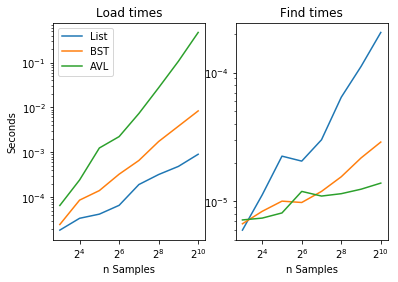

In [10]:
ComparisonPlots()